<a href="https://colab.research.google.com/github/pqrt12/Stock/blob/master/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: artificial recurrent neural network, Long Short Term Memory (LSTM).
  Using 60 days stock price to predict the closing stock price of Apple.

In [1]:
# import
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


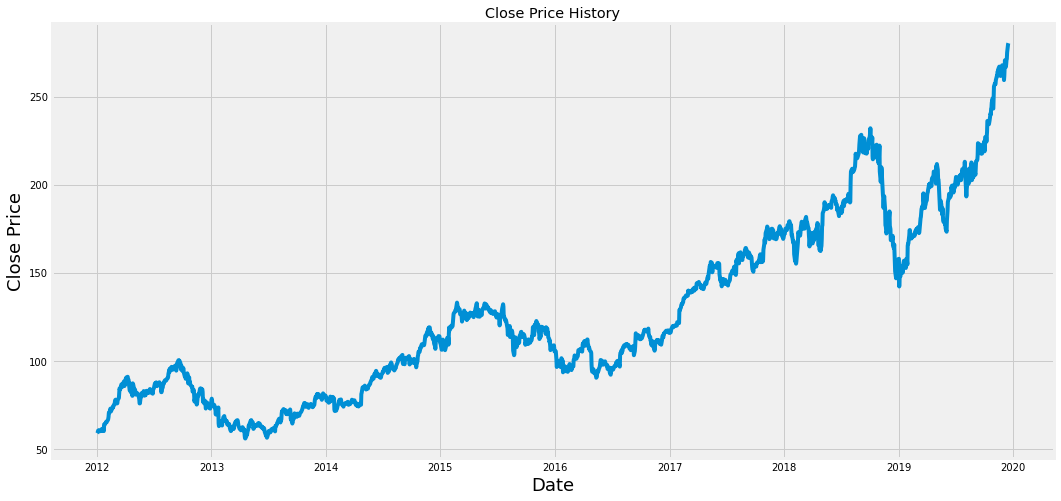

In [3]:
# visualize
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# create a dataframe with only the 'close' column
data = df.filter(['Close'])
# convert to numpy array
dataset = data.values
# the number of rows to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1603

In [5]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [0]:
# create the training dataset
train_data = scaled_data[0:training_data_len, :]

# split into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60 : i, 0])
  y_train.append(train_data[i, 0])

In [7]:
# convert teh x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1543, 60)

In [0]:
#x_train.shape.to_list()

In [9]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [0]:
# build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# train the model
# this takes a long long time.
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 59s 38ms/step - loss: 9.2902e-04


In [0]:
# testing dataset
test_data = scaled_data[training_data_len - 60 : , :]
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])


In [0]:
# convert to numpy array
x_test = np.array(x_test)
# reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# get the predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
# get the root mean square error (RMSE)
youtube = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f'youtube={youtube}, rmse={rmse}')

youtube=0.27123199462890624, rmse=6.342347339273913


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


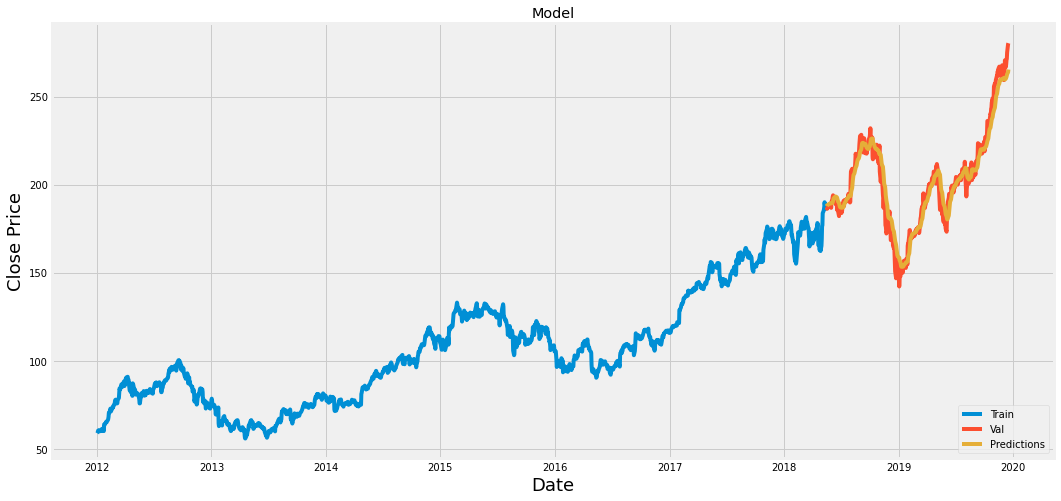

In [17]:
# plot the data
train = data[: training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
# Visualize
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# show the data
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,187.858521
2018-05-18,186.309998,188.354233
2018-05-21,187.630005,188.578644
2018-05-22,187.160004,188.765686
2018-05-23,188.360001,188.866302
...,...,...
2019-12-11,270.769989,261.308350
2019-12-12,271.459991,262.030060
2019-12-13,275.149994,262.822662


In [20]:
size = 60
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2020-05-14')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-size : ].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[294.76212]]


In [21]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-05-15', end='2020-05-15')
print(apple_quote2['Close'])

Date
2020-05-15    307.709991
Name: Close, dtype: float64
